## Notebook for going from the kwik files (kwd/kwe/kwik) to rasters
Uses:
    - intan2kwik (https://github.com/zekearneodo/intan2kwik/blob/master/README.md)
    - mountainlab suite(https://github.com/flatironinstitute/mountainlab-js)
    - mountainsort https://github.com/flatironinstitute/mountainsort_examples/blob/master/README.md
    - mountainsort examples https://github.com/flatironinstitute/mountainsort_examples/blob/master/README.md

In [1]:
import socket
import os
import glob
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload


import logging

# Setup the logger
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

ch = logging.StreamHandler()
ch.setLevel(logging.INFO)
ch.setFormatter(formatter)
logger.addHandler(ch)
        
logger.info('Logger set')
logger.info('Hostname {}'.format(socket.gethostname()))


from pipefinch.pipeline import rigutil
from pipefinch.pipeline import filestructure as et


from pipefinch.h5tools.kwik import kutil
from pipefinch.h5tools.kwik import event as ev

from pipefinch.h5tools.kwik import kwikfunctions as kwkf
from pipefinch.h5tools.kwik import kwdfunctions as kwdf

from pipefinch.neural.postsort import session
       

2019-07-29 18:00:06,550 - root - INFO - Logger set
2019-07-29 18:00:06,551 - root - INFO - Hostname zpikezorter


### Session parameters and raw files

In [13]:
# session parameters
sess_par = {'bird': 'b11k10',
           'sess': '2019-07-11_0250_01',
           'probe': 'probe_0', # probe to sort ('probe_0', 'probe_1') (to lookup in the rig_par which port to extract)
            'sort': 1
           }

# visualization default parameters
viz_par = { 'evt_name': 'motif',
           'evt_signal': 'trig_perceptron',
            'evt_edge': 1,
            'pre_ms': -500,
            'post_ms': 300,
            
            'pre_samples': 0,
            'post_samples': 0,
            'span': 0,
            }

exp_struct = et.get_exp_struct(sess_par['bird'], sess_par['sess'], sess_par['sort'])

logger.info('Raw folder {}'.format(exp_struct['folders']['raw']))

kwik_folder = exp_struct['folders']['kwik']
kwd_path = exp_struct['files']['kwd']
exp_struct

2019-07-30 00:03:46,327 - root - INFO - Raw folder /mnt/microdrive/birds/b11k10/Ephys/raw/2019-07-11_0250_01


{'folders': {'raw': '/mnt/microdrive/birds/b11k10/Ephys/raw/2019-07-11_0250_01',
  'kwik': '/data/experiment/microdrive/b11k10/Ephys/kwik/2019-07-11_0250_01',
  'msort': '/data/experiment/microdrive/b11k10/Ephys/msort/2019-07-11_0250_01',
  'ksort': '/data/experiment/microdrive/b11k10/Ephys/ksort/2019-07-11_0250_01'},
 'files': {'par': '/data/experiment/microdrive/b11k10/Ephys/ksort/2019-07-11_0250_01/params.json',
  'set': '/mnt/microdrive/birds/b11k10/Ephys/raw/2019-07-11_0250_01/settings.isf',
  'rig': '/mnt/microdrive/birds/b11k10/Ephys/raw/2019-07-11_0250_01/rig.json',
  'kwd': '/data/experiment/microdrive/b11k10/Ephys/kwik/2019-07-11_0250_01/streams.kwd',
  'kwik': '/data/experiment/microdrive/b11k10/Ephys/kwik/2019-07-11_0250_01/sort_1/spikes.kwik',
  'kwe': '/data/experiment/microdrive/b11k10/Ephys/kwik/2019-07-11_0250_01/events.kwe',
  'mda_raw': '/data/experiment/microdrive/b11k10/Ephys/msort/2019-07-11_0250_01/raw.mda',
  'bin_raw': '/data/experiment/microdrive/b11k10/Ephys/

In [14]:
kwd_path = exp_struct['files']['kwd']
reload(ev)
ttl = ev.TTL('ttl', 'DIN', kwd_path)
np.unique(ttl.event_pd['ch'])

array(['DIN-00'], dtype=object)

### instantiate a session object

In [3]:
reload(session)

<module 'pipefinch.neural.postsort.session' from '/home/ezequiel/repos/pipefinch/pipefinch/neural/postsort/session.py'>

In [4]:
sess = session.Session(sess_par, viz_par)
sess.load_rig_par()
sess.load_mic_peri_event_streams()

KeyError: 'DIN-01'

In [5]:
sess.get_event_ttl()

KeyError: 'DIN-01'

In [13]:
sess.rig_par['chan']['ttl']['trig_perceptron']

'DIN-01'

In [10]:
sess.rig_par['ttl']['trig_perceptron']

KeyError: 'ttl'

In [16]:
from pipefinch.neural import basic_plot as bp
reload(bp)
reload(session)
from pipefinch.util import spectral

fig = session.plot_unit(sess, 55, example_event_id=2);

KeyError: "Unable to open object (object '55' doesn't exist)"

2019-07-29 17:52:39,877 - pipefinch.neural.postsort.session - WARNING - Failed to plot clu 1, error 'DIN-01'
Traceback (most recent call last):
  File "/home/ezequiel/anaconda3/envs/sort/lib/python3.6/site-packages/pandas/core/indexes/base.py", line 2657, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 132, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1601, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1608, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'DIN-01'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ezequiel/repos/pipefinch/pipefinch/neural/postsort/session.py", line 387, in plot_all_units
    fig = plot_unit(sess, clu, example_event_id=example_event_idx)
 

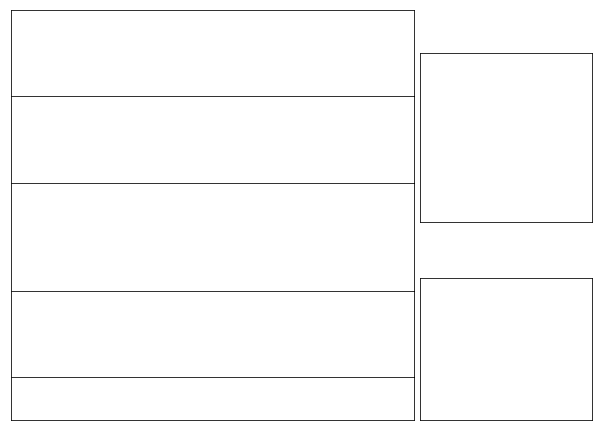

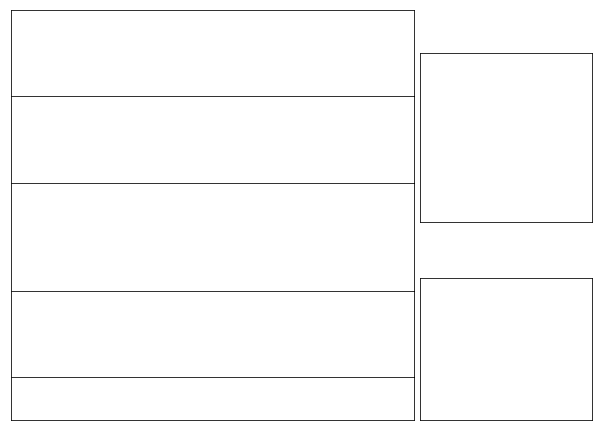

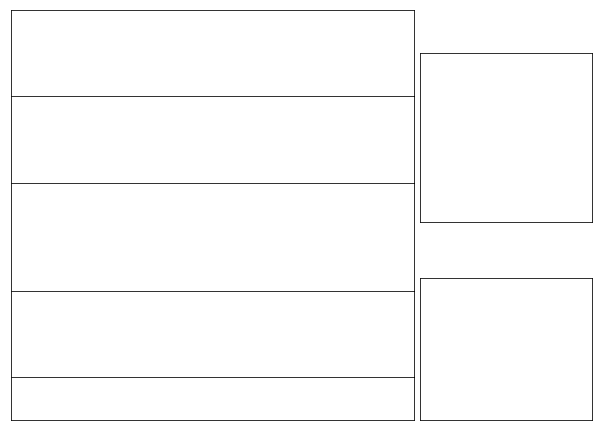

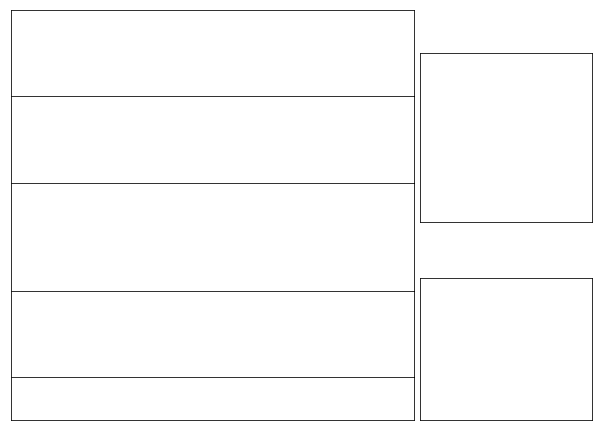

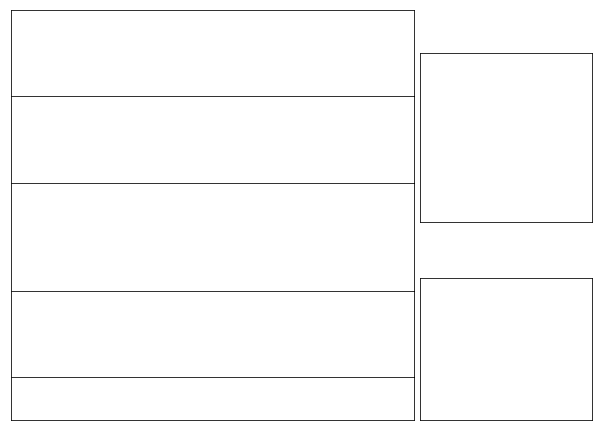

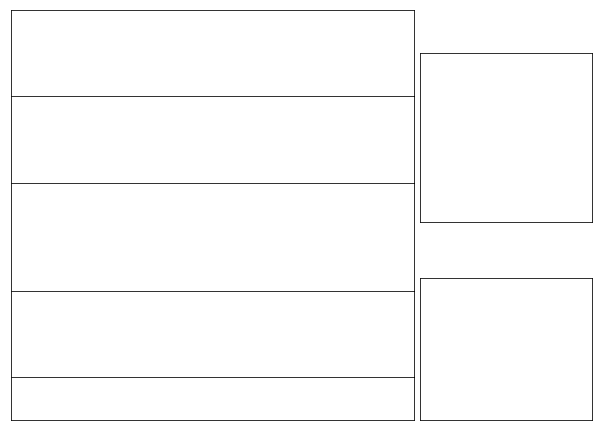

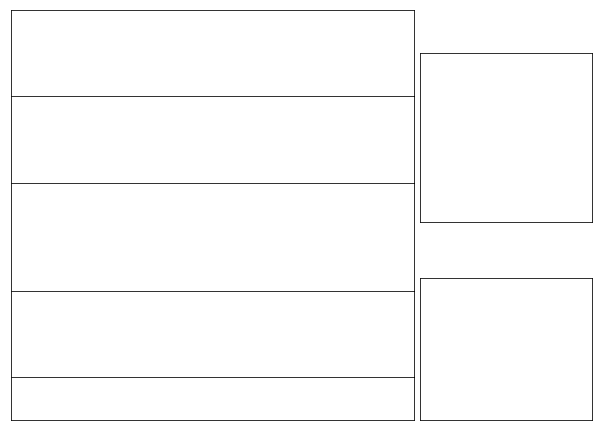

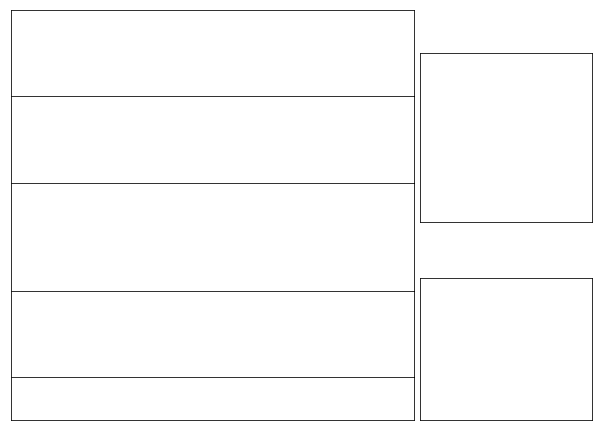

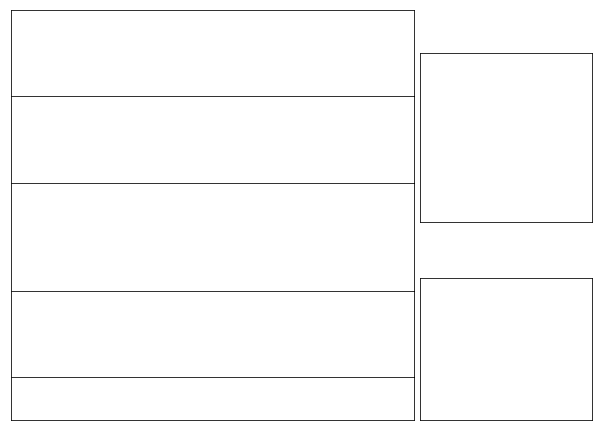

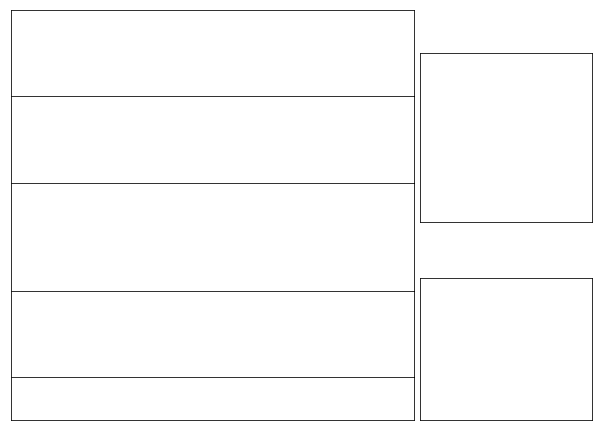

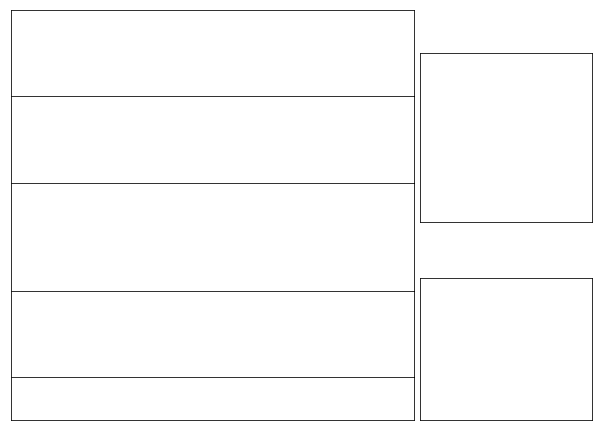

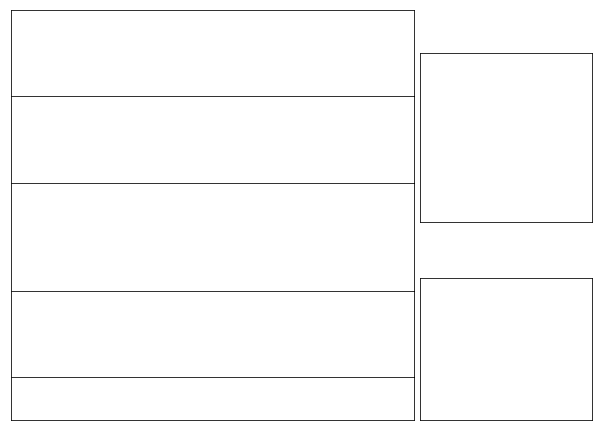

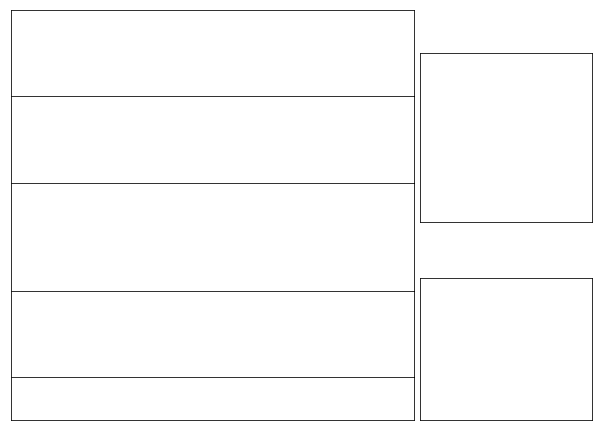

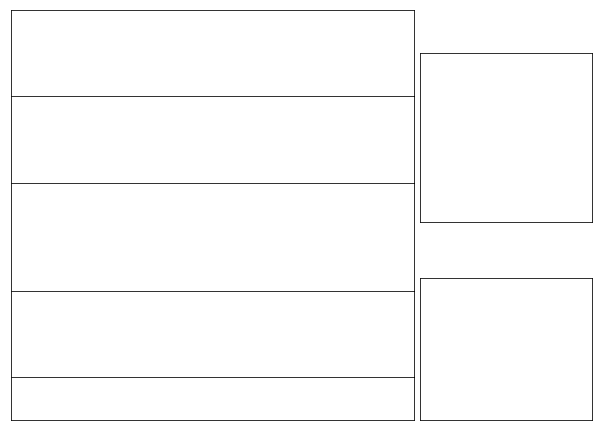

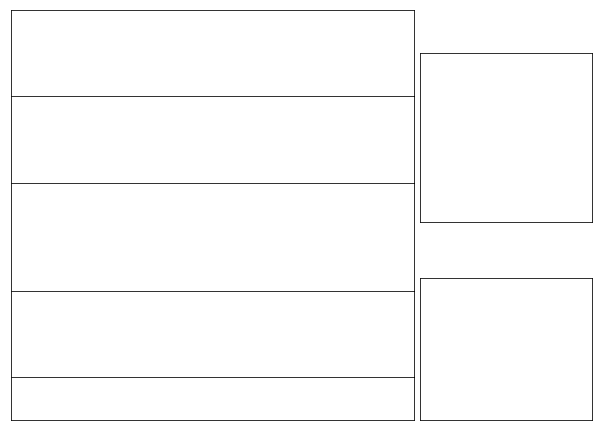

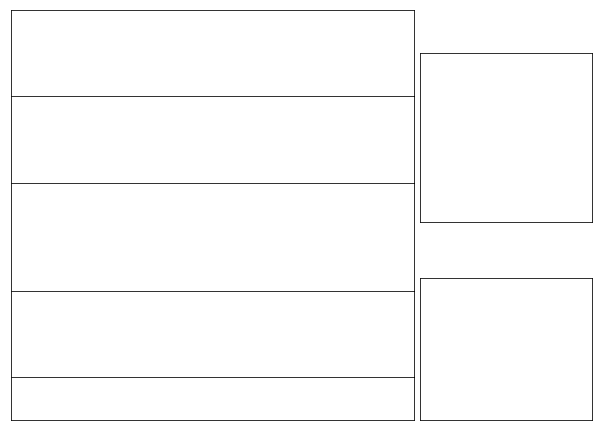

In [17]:
reload(session)
session.plot_all_units(sess, only_tags = ['accepted', 'mua'], example_event_idx=2)

In [9]:
reload(units)

<module 'pipefinch.neural.units' from '/home/ezequiel/repos/pipefinch/pipefinch/neural/units.py'>

In [13]:
a_unit = units.Unit(29, sess.kwik_path, sess.kwd_path, port=sess.probe_port)
a_unit.get_time_stamps()
a_unit.get_attrs()
a_unit.get_unit_chan_names()
a_unit.get_unit_main_chans_names()

array(['A-013', 'A-010', 'A-015', 'A-011'], dtype='<U6')

# DEBUG VIEWING UNITS

2019-07-28 23:47:45,417 - pipefinch.h5tools.kwik.kwdfunctions - INFO - valid starts [ 848929  106852  718803 ... 2444361 3307769 1689410]
2019-07-28 23:47:47,473 - pipefinch.h5tools.kwik.kwdfunctions - INFO - valid starts [ 764825 1179934 1772032  565662  730644 1628016 1545744 1406748  911800
  351907  324179  681375 1612312  621201 1044614  477770  352671  337905
 1150197  730762 1406553  869113 1993608 1988111  652883  869193 1044845
  718791 1078168  179533  941323 1057181  314834  960950  179314  818924
   79825  588220 1119865  777580  133677 1327878 1546085 1363447  352012
 1022774 1627750  682014  324325  117630 1365346 1054451  409555 1993800
 1522221 1680676 1240888 1180107  754505 1883950 1611966 1179421  819619
 1982768  630273  995368  479396 1993880  479262  573027  665085 1255240
 1703836  653210 1023061  314242  754581  778091  342201 1255456  961136
 1432624 1489497 1077071  338498 1406094  636027  588036  597702  565990
  600773  718905  681655  299133  607827  526546

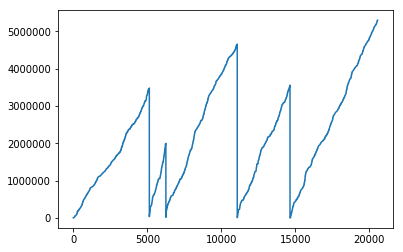

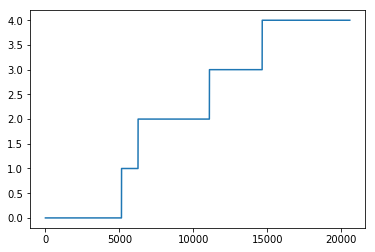

In [14]:
from pipefinch.neural import units
reload(kwdf)
reload(units)

a_unit = units.Unit(29, sess.kwik_path, sess.kwd_path)
t, r = a_unit.get_time_stamps()
a_unit.get_unit_spikes()

plt.plot(t)
plt.figure()
plt.plot(r)

In [ ]:
units.Unit(7, sess.kwik_path, sess.kwd_path).get_unit_spikes()

In [ ]:
reload(kwdf)

spk_arr = kwdf.collect_frames_fast(sess.kwd_path, r,  t-20,40, np.arange(32))

In [ ]:
spk_arr.shape

In [ ]:
sample = np.empty(0)
try:
    assert sample.size > 0, "no valid events"
except AssertionError as err:
    print(err.args)


In [ ]:
# get all unit waveforms in parallel
reload(units)
units.get_all_unit_waveforms(sess.kwik_path, sess.kwd_path)

In [ ]:
import h5py
kwkfile = h5py.File(sess.kwik_path, 'r')

r_path = "/channel_groups/0/spikes/recording"
clu_path = "/channel_groups/0/spikes/clusters/main"
t_path = '/channel_groups/0/spikes/time_samples'

recs = kwkfile[r_path][:]
clu = kwkfile[clu_path][:]
times = kwkfile[t_path][:]

In [ ]:
kwkfile.close()

In [ ]:
np.unique(recs)

In [ ]:
kwkfile['/channel_groups/0/spikes/clusters/main'][:]

In [ ]:
probe = {}
probe['a1x32-edge-5mm-20-177_H32'] = {i+1: (0, i*20) for i in range(32)}


# port_site maps
# each port is a dict {port: site}, where port is an int, site is an int
# port is

headstage = {}
headstage['intan-32-nn32'] = {23: 15, 22: 6, 21: 5, 20: 4, 19: 16, 18: 3, 17: 2, 16: 1,
                            15: 32, 14: 31, 13: 30, 12: 17, 11: 29, 10: 28, 9: 27, 8: 18,
                            24: 13, 25: 12, 26: 11, 27: 10, 28: 14, 29: 9, 30: 8, 31: 7,
                            0: 26, 1: 25, 2: 24, 3: 19, 4: 23, 5: 22, 6: 21, 7: 20}

def make_map(a_probe: dict, a_headstage: dict):
    # want to retrieve what coordinates are in each port of the headstage
    # headstage is {port: site}, probe is {site: coords}
    port_coords = {port: np.array(a_probe[site]) for port, site in sorted(a_headstage.items())}
    return (list(port_coords.values()))
    
np.vstack(make_map(probe['a1x32-edge-5mm-20-177_H32'], headstage['intan-32-nn32']))

In [ ]:
def site_port_map(probe_name: str, headstage_name: str):
    a_probe = probe[probe_name]
    a_headstage = headstage[headstage_name]

    return [h_port for site in a_probe.keys() for h_port, h_site in a_headstage.items() if h_site==site]

site_port_map('a1x32-edge-5mm-20-177_H32', 'intan-32-nn32')

In [23]:
import os